In [1]:
import torch
import torch.nn as nn
import torchvision

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import albumentations as A
import albumentations.pytorch
import cv2
import math

In [ ]:
#https://vfdev-5-albumentations.readthedocs.io/en/docs_pytorch_fix/api/augmentations.html#module-albumentations.augmentations.transforms
#https://albumentations.ai/docs/api_reference/augmentations/transforms/

In [124]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(img)

In [125]:
import easydict 
args = easydict.EasyDict({ "batch_size": 2, 
                          "epochs": 50, 
                          "data": 0, 
                          'lr':0.1,
                         'momentum':0.9,
                         'weight_decay':1e-4,
                         'start_epoch':0,
                         'gpu':5,
                          'workers':2})

In [126]:
df = pd.read_csv('../../data/df.csv')
df.head()
#df.insert(0, 'ID', range(0, len(df)))
#df.to_csv('../../data/df.csv', index=None)

ID                                          file_name            task  \
0   0  patch_images/2021.01.12/LBC305-20210108(1)/LBC...  [ASCUS] LBC305   
1   1  patch_images/2021.01.12/LBC305-20210108(1)/LBC...  [ASCUS] LBC305   
2   2  patch_images/2021.01.12/LBC305-20210108(1)/LBC...  [ASCUS] LBC305   
3   3  patch_images/2021.01.06/LBC37-20210102(1)/LBC3...   [ASCUS] LBC37   
4   4  patch_images/2021.01.06/LBC37-20210102(1)/LBC3...   [ASCUS] LBC37   

                    bbox  xmin  ymin     w     h   label  occluded  des  \
0   [56, 35, 1980, 1985]    56    35  1980  1985    판독불가         0  NaN   
1   [56, 30, 1912, 1937]    56    30  1912  1937    판독불가         0  NaN   
2   [21, 12, 2010, 2027]    21    12  2010  2027    판독불가         0  NaN   
3  [1349, 420, 100, 113]  1349   420   100   113  ASC-US         0  NaN   
4  [1575, 720, 163, 213]  1575   720   163   213  ASC-US         0  NaN   

                                           cell_type  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  Atypical squamous cells of undetermined signif...  
4  Atypical squamous cells of undetermined signif...

In [127]:
path = '/home/NAS/nas4/project_scl/' + df.file_name.values[50]
print(path)

/home/NAS/nas4/project_scl/patch_images/2021.01.07/LBC84-20210104(1)/LBC84-20210104(1)_1139.png


In [128]:
image= cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [129]:
#visualize(image, [], [], [])

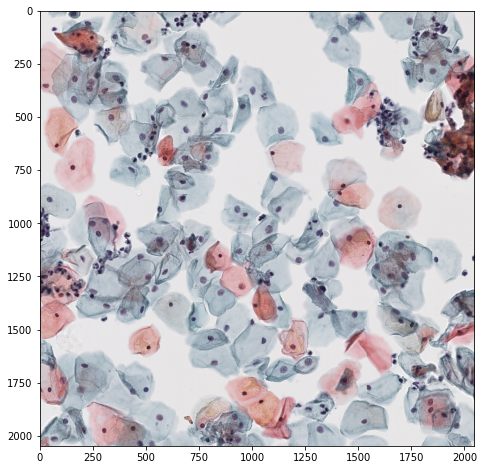

In [130]:
plt.figure(figsize=(8, 8))
plt.imshow(image)

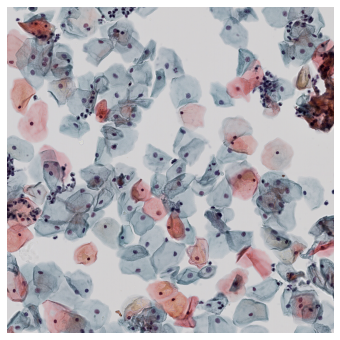

In [131]:
#RandomContrast 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

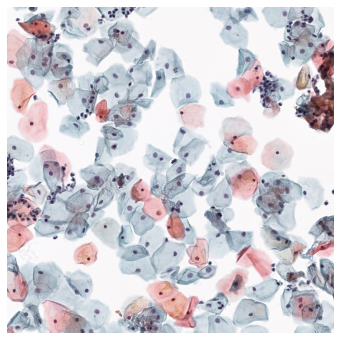

In [132]:
#RandomContrast 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomContrast(limit=0.2, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

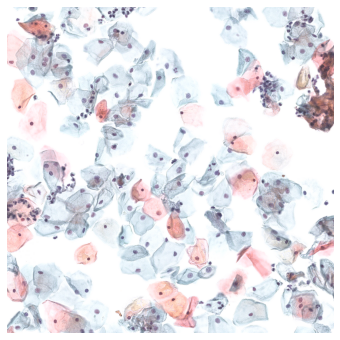

In [133]:
#RandomContrast 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomBrightness(limit=0.5, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

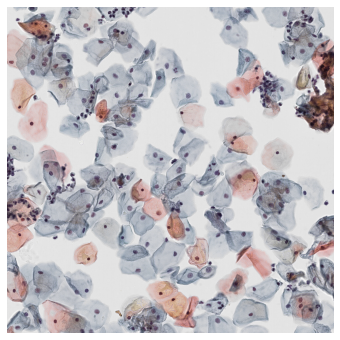

In [134]:

#RandomContrast 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

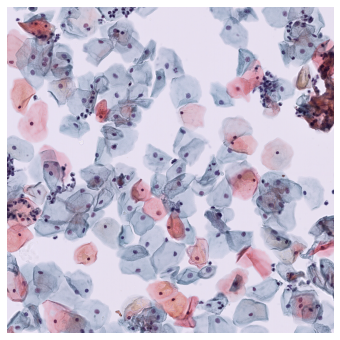

In [174]:

#RandomContrast 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

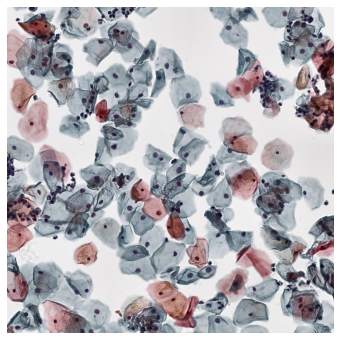

In [173]:
#RandomContrast 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

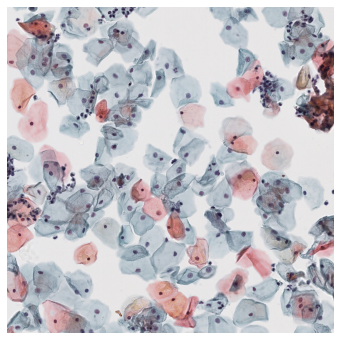

In [137]:
#RandomContrast 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.JpegCompression(quality_lower=99, quality_upper=100, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

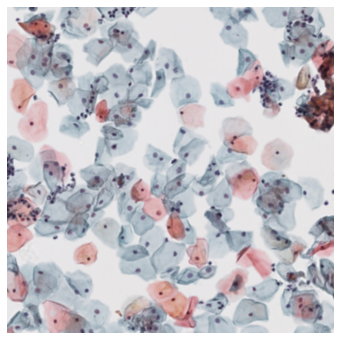

In [175]:
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.2, alpha_coef=0.08, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

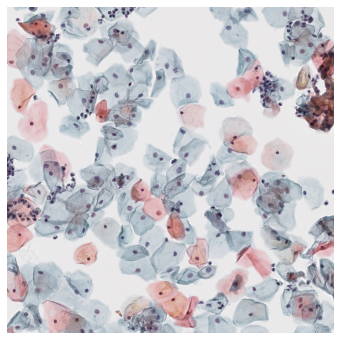

In [177]:

transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomGamma(gamma_limit=(80, 120), eps=None, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

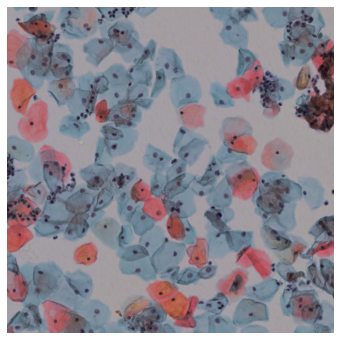

In [140]:
#albumentations.augmentations.transforms.RandomRain (slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=7, brightness_coefficient=0.7, rain_type=None, always_apply=False, p=0.5)

transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomRain(p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

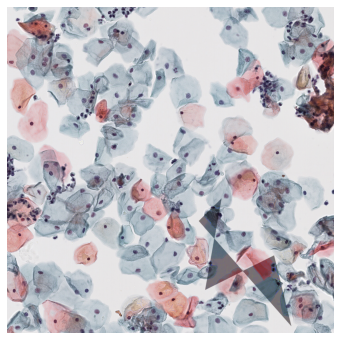

In [141]:
 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomShadow(p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

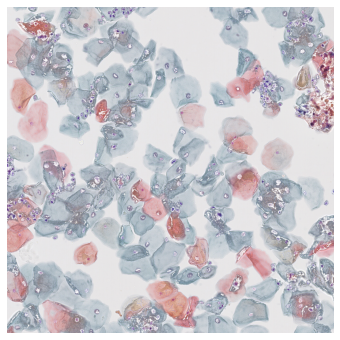

In [142]:
 
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomSnow(p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

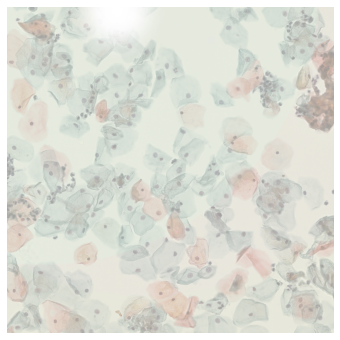

In [143]:
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.RandomSunFlare(p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

In [144]:
'''
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.Sharpen(p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)
'''

"\ntransform = A.Compose(\n#    A.HorizontalFlip(p=0.5),\n    [A.transforms.Sharpen(p=1.)],\n)\ntransformed = transform(image=image)\nvisualize(\n    transformed['image'],\n    [], [], []\n)\n"

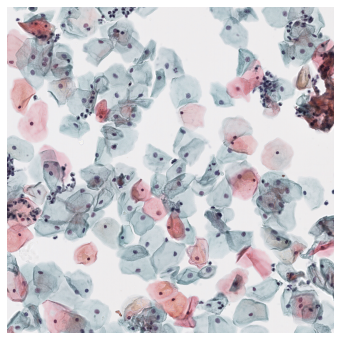

In [178]:
transform = A.Compose(
#    A.HorizontalFlip(p=0.5),
    [A.transforms.ColorJitter(brightness=0.05, contrast=0.2, saturation=0.2, hue=0.02, p=1.)],
)
transformed = transform(image=image)
visualize(
    transformed['image'],
    [], [], []
)

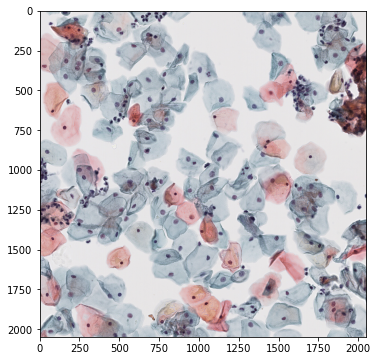

In [147]:
plt.figure(figsize=(6, 6))
plt.imshow(image)